In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [140]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [141]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

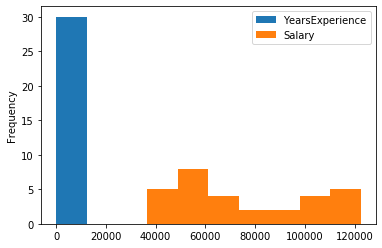

In [142]:
df.plot.hist(bins=10)

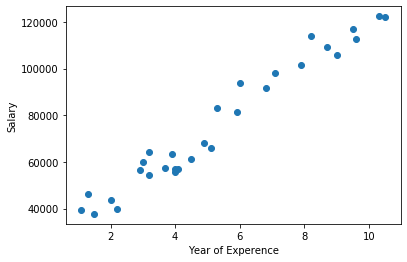

In [143]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel('Year of Experence')
plt.ylabel('Salary')
plt.show()

In [144]:
# It is a simple linear Regression.
#This shows that increase in years of experience increases salary.

In [145]:
x=df.iloc[:,0:1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [146]:
y=df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [147]:
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score) 

max r2 score corresponding to 47 is 0.9790594841338117


In [151]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

-2.1183606636372394

In [152]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [158]:
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9442888159790965

In [159]:
pred=lm.predict(x_test)

In [160]:
print("Mean absolute error",mean_absolute_error(y_test,pred))

Mean absolute error 2933.2953665191935


In [165]:
print("Mean_squared error",mean_squared_error(y_test,pred))
#cross validation of model
from sklearn.model_selection import cross_val_score
lm=linear_model.LinearRegression()
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

Mean_squared error 15391810.22485748
[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
-0.05336427684509644
0.6031723433172346


In [163]:
#saving the model
from sklearn.externals import joblib
joblib.dump(lm,'salary.pkl')

C:\Users\Suncity\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['salary.pkl']